In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
#for debug
%load_ext autoreload
%autoreload 2
os.environ["OMP_NUM_THREADS"] = "10"
data_path='/dybfs2/nEXO/fuys/others/sw_work/data'
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [51]:
""" get selected useful factor name"""
%load_ext autoreload
%autoreload 2

input_para=[1, 1, 'normal_ic', 'All']#
return_time = input_para[0]
factor_back_time = input_para[1]
ic_types=input_para[2]
factor_type=input_para[3]

selected_cols = ['snapshot_direct_imbalance_vol2', 'C_3_aggre_sum', 'bid_mean_volume_aggre_volatility', 'snapshot_direct_imbalance_vol1_aggre_sum', \
                    'C_10', 'C_11', 'acc_volume_imbalance4_aggre_skew', 'orderbook_dispersion_5', 'volume_proportion_imbalance_3_aggre_volatility', \
                      'volume_imbalance3', 'slope_imbalance_fine_aggre_abs_sum', 'volume_imbalance4_aggre_sum', 'acc_volume_imbalance2_aggre_sum','return']#,\
                      # 'C_3_aggre_skew','C_3','C_12_aggre_sum','ask_mean_volume']

os.chdir(data_path+'/ic_results_data/%s_factor_data/'%factor_type)
fname_list = [x for x in os.listdir() if "2020" in x or "2021" in x]
read_cols = ['Symbol','TradingTime'] + selected_cols 

factor_result_df = pd.DataFrame()
fname_list.sort()
for file in fname_list[0:10]:
    
    df_oneday = pd.read_hdf(file)
    selected_df = df_oneday[read_cols]
    factor_result_df = pd.concat([factor_result_df,selected_df],ignore_index=True)
    print(file.split('_')[-1])

# print(factor_result_df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
20200102.h5
20200103.h5
20200106.h5
20200107.h5
20200108.h5
20200109.h5
20200110.h5
20200113.h5
20200114.h5
20200115.h5


In [ ]:
print(factor_result_df)

0         0.000000
1         0.004997
2         0.014999
3         0.000000
4         0.004997
            ...   
201339    0.000000
201340    0.000000
201341    0.005005
201342    0.005005
201343    0.000000
Name: return, Length: 201344, dtype: float32


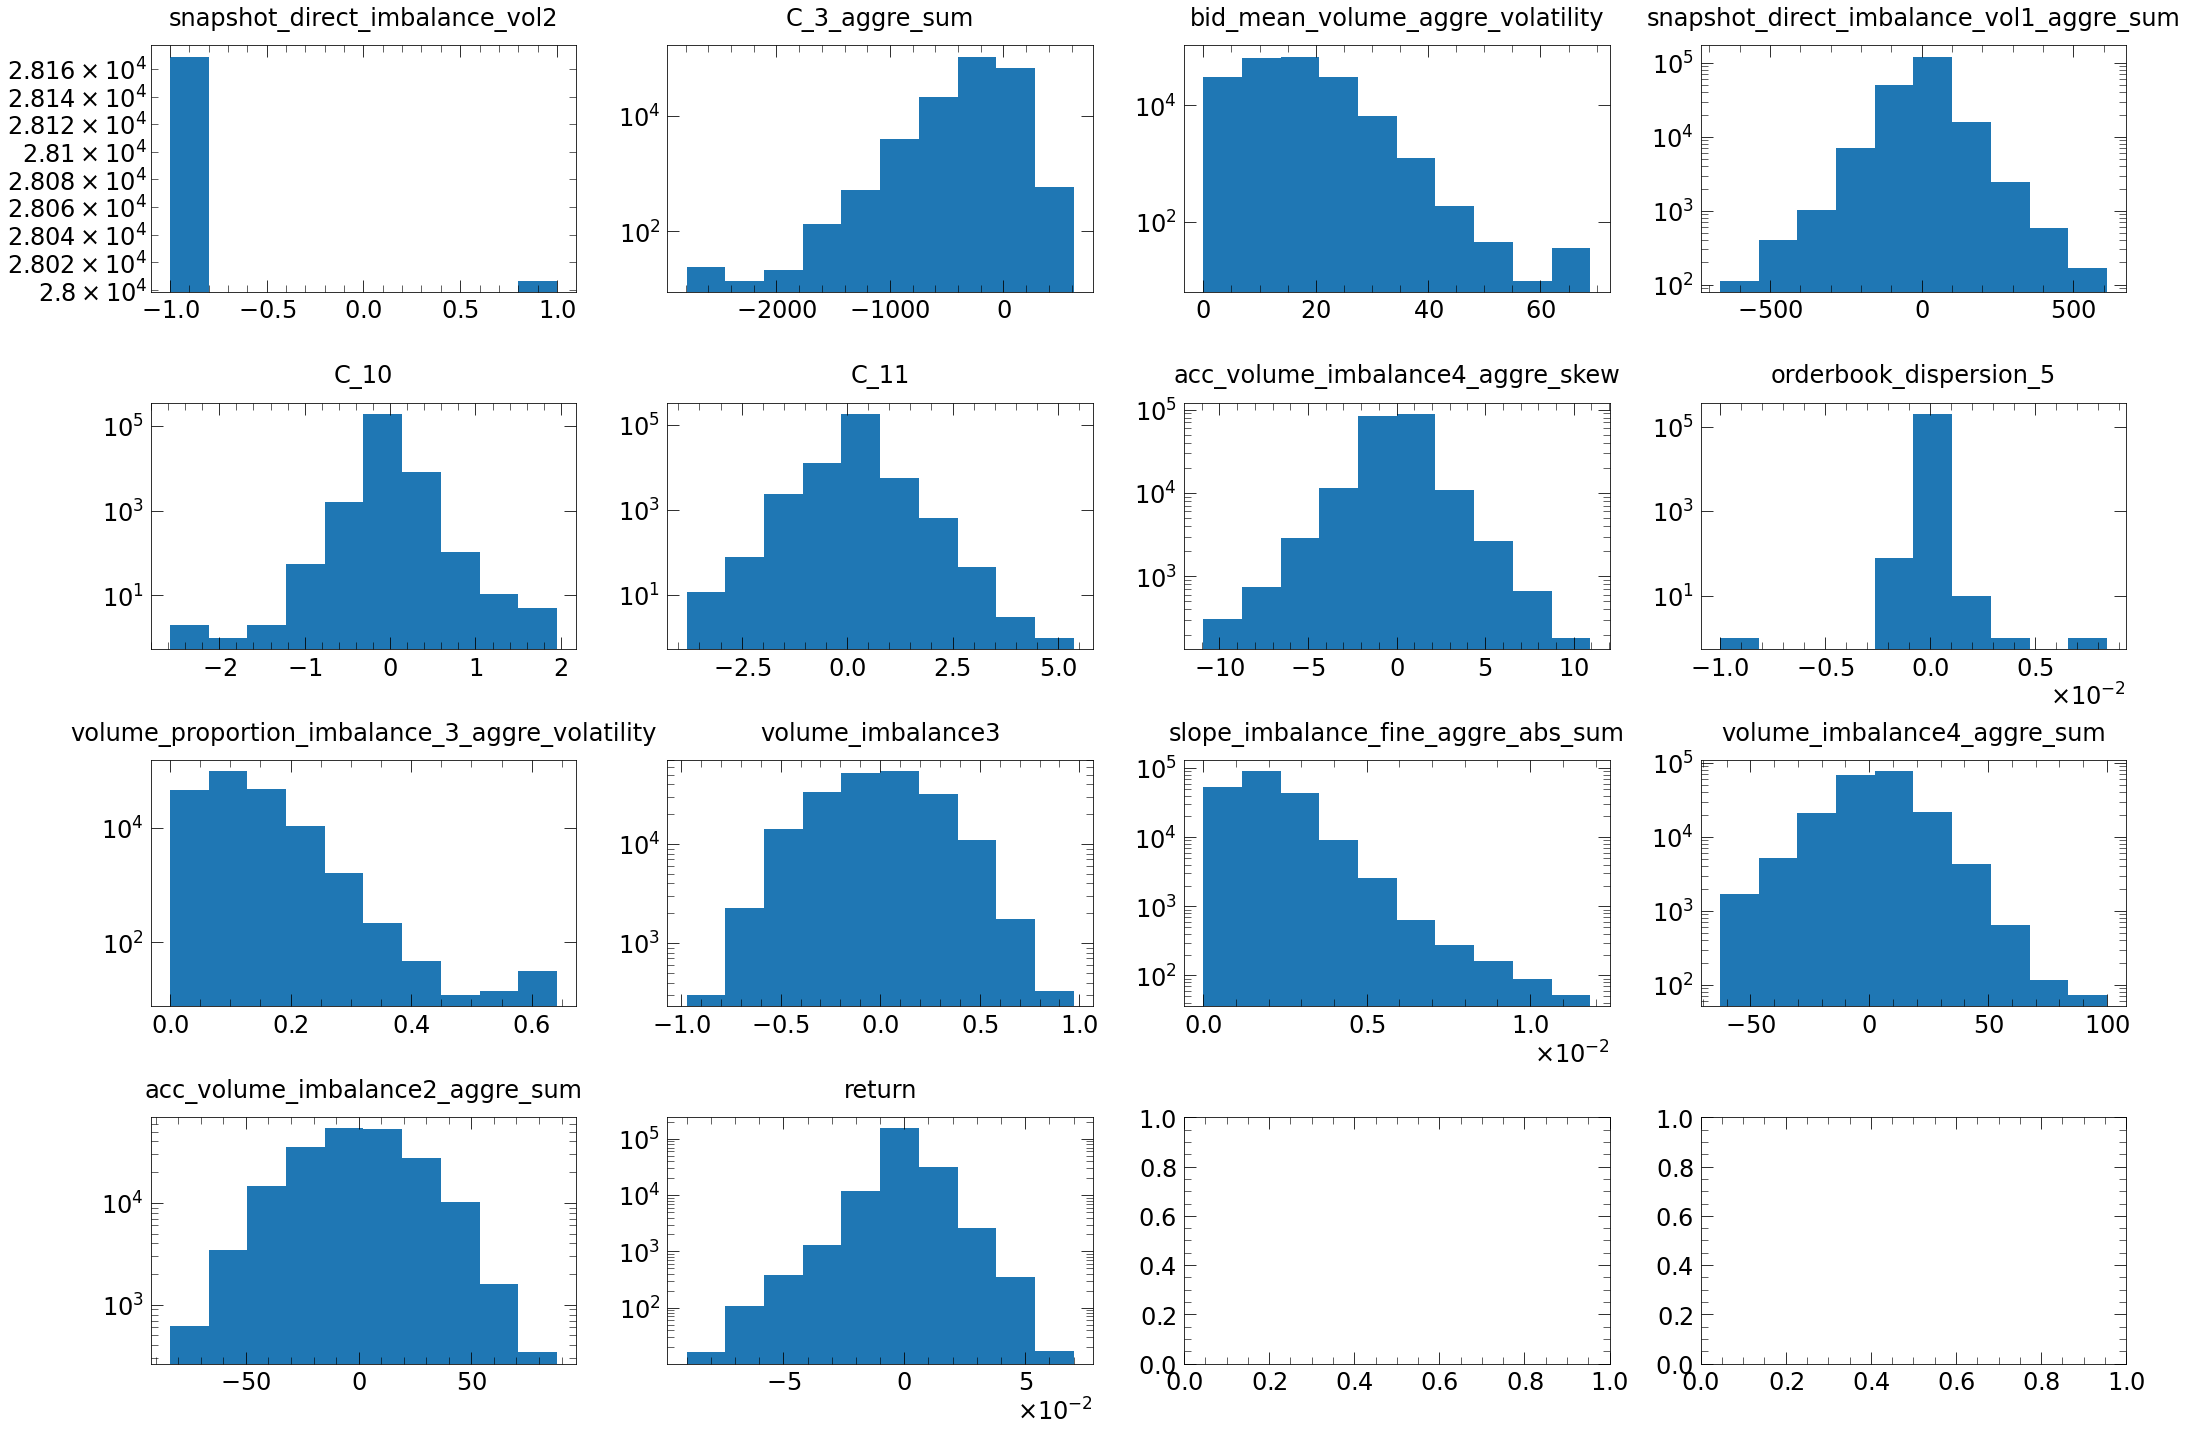

In [59]:
%matplotlib inline
import math
import math

cols = 4
rows = math.ceil(len(selected_cols) / cols)

# plt.plot(factor_result_df['orderbook_dispersion_5'],'.')

# print((factor_result_df['orderbook_dispersion_5']!=0).sum())
# print((factor_result_df['orderbook_dispersion_5']==0).sum())

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, 20))
ax = ax.flatten()  # 将二维数组展平成一维数组以便更容易管理

for i in range(len(selected_cols)):
    try:
        ax[i].hist(factor_result_df[selected_cols[i]])
        ax[i].set_title(selected_cols[i])
        ax[i].set_yscale('log')
    except:
        continue

plt.tight_layout()

No handles with labels found to put in legend.


(1707, 16)


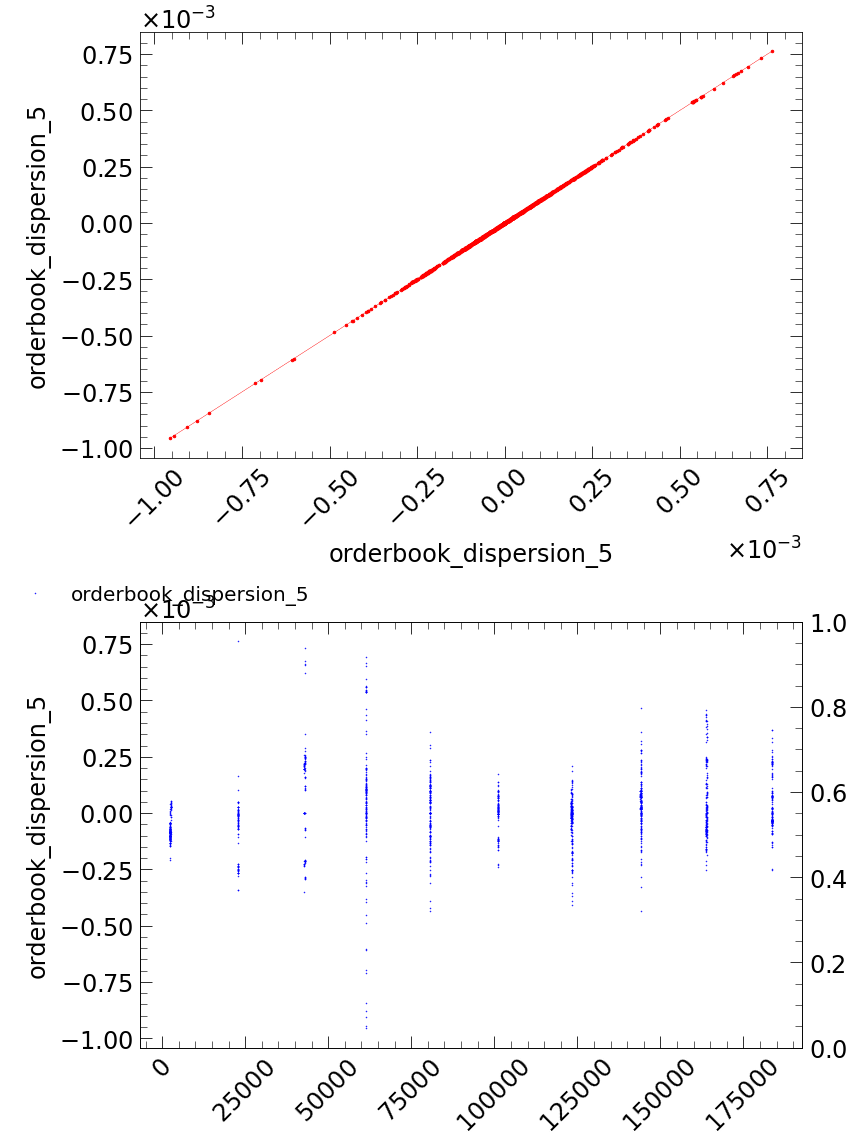

In [56]:
# for index in range(len(factor_result_df)):
    # print(factor_result_df.loc[index,'TradingTime'])
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(12,16))


# y_var = 'C_12_aggre_sum'
# y_var = 'ask_mean_volume'
x_var = 'C_3'
y_var = 'C_3_aggre_skew'
start_time = pd.to_datetime('09:39:00').time()
end_time = pd.to_datetime('09:41:01').time()
# end_time = pd.to_datetime('15:15:01').time()

result_df = factor_result_df.loc[(factor_result_df['TradingTime'].dt.time >= start_time) \
                                 & (factor_result_df['TradingTime'].dt.time < end_time)]
print(result_df.shape)
ax[0].plot(result_df.loc[120:,[x_var]],\
        result_df.loc[120:,[y_var]],'r.--',markersize=5,lw=0.3)

ax[0].xaxis.set_tick_params(rotation=45)
ax[0].set_ylabel(y_var)
ax[0].set_xlabel(x_var)


# ax[1].plot(result_df['TradingTime'],result_df['ask_mean_volume'],'m.-',markersize=2,lw=0.5,label="ask_mean_volume")
ax[1].plot(result_df['TradingTime'],result_df[x_var],'b.-',markersize=1,lw=0.2,label=x_var)
ax2 = ax[1].twinx()
ax2.plot(result_df['TradingTime'],result_df[y_var],'c.-',markersize=2,lw=0.2,label=y_var)
ax[1].legend(fontsize=20,loc=(-0.2,1.02))
ax2.legend(fontsize=20,loc=(0.5,1.02))
ax[1].set_ylabel(x_var)
ax[1].xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.savefig("./test.pdf")